# ResNet-Competition

__Author:<br>
Name here [email@example.com](mailto:email@example.com)__

In [10]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input, Activation, add
from keras.utils import to_categorical
from keras import initializers
import tensorflow as tf


pixel_count =  355


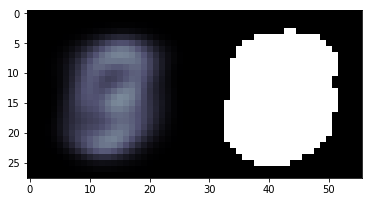

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255
# data preprocessing
cutoff = 0.051
mean_train_image = np.mean(X_train, axis=0)
mean_train_image_cutoff = mean_train_image > cutoff
plt.imshow(np.concatenate((mean_train_image ,mean_train_image_cutoff), axis=1), clim=[0,1], cmap='bone')

pixel_count = np.sum(mean_train_image_cutoff)
print('pixel_count = ',pixel_count)

X_train = X_train[:, mean_train_image_cutoff]
X_test = X_test[:, mean_train_image_cutoff]

# one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
def custom_dense(size=17, activation = tf.nn.swish):
    return Dense(size,
                 activation = activation,
                 kernel_initializer = initializers.RandomNormal(0.0, 0.01, seed=123),
                 bias_initializer = 'zero',
                 
                
                )
def resnet_block(dim, x, activation='relu'):
    # Can only handle shortcuts between layers of the same shape.
    shortcut = x
    x = custom_dense(dim)(x)
    x = custom_dense(dim, activation=None)(x)
    x = add([shortcut, x])
    x = Activation(activation)(x)
    return x
#end def

def model_config():
    inp = Input(shape=(pixel_count, ))
    x = custom_dense(17)(inp)
    x = resnet_block(17, x)
    x = resnet_block(17, x)
    x = resnet_block(17, x)
    x = resnet_block(17, x)
    x = resnet_block(17, x)
    x = resnet_block(17, x)

    x = custom_dense(10, activation='softmax')(x)
    
    model = Model(inputs = [inp], outputs=x)
    return model

def model_config_deeper():
    inp = Input(shape=(pixel_count, ))
    x = custom_dense(12)(inp)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    x = resnet_block(12, x)
    

    x = custom_dense(10, activation='softmax')(x)
    
    model = Model(inputs = [inp], outputs=x)
    return model

In [62]:
model = model_config_deeper()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 355)          0                                            
__________________________________________________________________________________________________
dense_270 (Dense)               (None, 12)           4272        input_19[0][0]                   
__________________________________________________________________________________________________
dense_271 (Dense)               (None, 12)           156         dense_270[0][0]                  
__________________________________________________________________________________________________
dense_272 (Dense)               (None, 12)           156         dense_271[0][0]                  
__________________________________________________________________________________________________
add_116 (A

In [63]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

model.fit(X_train, y_train, epochs=500,
          validation_split=0.1,
          callbacks=[ES],
          shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 22s 405us/step - loss: 0.6854 - acc: 0.7839 - val_loss: 0.3074 - val_acc: 0.9075
Epoch 2/500
54000/54000 [==============================] - 16s 292us/step - loss: 0.3183 - acc: 0.9058 - val_loss: 0.2469 - val_acc: 0.9267
Epoch 3/500
54000/54000 [==============================] - 16s 298us/step - loss: 0.2653 - acc: 0.9200 - val_loss: 0.2058 - val_acc: 0.9367
Epoch 4/500
54000/54000 [==============================] - 17s 311us/step - loss: 0.2351 - acc: 0.9276 - val_loss: 0.1784 - val_acc: 0.9445
Epoch 5/500
54000/54000 [==============================] - 17s 306us/step - loss: 0.2151 - acc: 0.9345 - val_loss: 0.1761 - val_acc: 0.9452
Epoch 6/500
54000/54000 [==============================] - 16s 300us/step - loss: 0.1961 - acc: 0.9392 - val_loss: 0.1565 - val_acc: 0.9518
Epoch 7/500
54000/54000 [==============================] - 16s 305us/step - loss: 0.1804 - acc: 0.9450 - val_lo

In [53]:
print('final accuracy ResNet = ',model.evaluate(X_test, y_test)[1])

10000/10000 [==============================] - 0s 49us/step
final accuracy ResNet =  0.9644


In [64]:
print('final accuracy deeeep ResNet = ',model.evaluate(X_test, y_test)[1])

10000/10000 [==============================] - 1s 91us/step
final accuracy deeeep ResNet =  0.9576
